In [1]:
# simple matrix factorization
from scipy.sparse.csr import csr_matrix
from sklearn.decomposition import NMF
import pandas as pd
import numpy as np
from typing import Tuple
import log as lg
import matplotlib.pyplot as plt

/tmp/ipykernel_501/903360408.py:2: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  from scipy.sparse.csr import csr_matrix


In [2]:
def df2sparse(X: pd.DataFrame, user: pd.DataFrame, music: pd.DataFrame) -> csr_matrix:
    for col in X.columns:
        X[col] = X[col].astype("int64")
    print(X.dtypes)
    return csr_matrix((X["rating"], (X["user_id"], X["music_id"])), shape=(user.shape[0], music.shape[0]))
    

In [3]:
def NonNegativeMatrixFactorization(X: pd.DataFrame) -> Tuple[np.ndarray, np.ndarray]:
    logger = lg.init_logger()
    model = NMF(n_components=2, init="random", random_state=1, 
                max_iter=500, solver='mu', alpha_H=0.1, alpha_W=0.1, l1_ratio=0)
    W = model.fit_transform(X)
    H = model.components_
    return W, H

In [4]:
if __name__ == "__main__":
    df_rating = pd.read_csv("./rating.csv", header=0)
    df_user = pd.read_csv("./user.csv", header=0)
    df_music = pd.read_csv("./music.csv", header=0)
    rating_matrix = df2sparse(df_rating, df_user, df_music)
    print(df_rating.shape, rating_matrix.shape)
    W, H = NonNegativeMatrixFactorization(rating_matrix)
    print(W.shape, H.shape)

user_id     int64
music_id    int64
rating      int64
dtype: object
(5250, 3) (100, 150)
(100, 2) (2, 150)


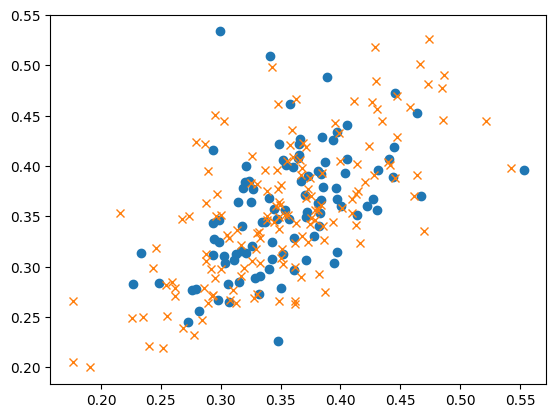

In [142]:
plt.plot(W[:,0], W[:,1], 'o')
plt.plot(H[0,:], H[1,:], 'x')
plt.show()